In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [14.00, 6]

### Data collection and preparation

As a first step the data is read as a dataframe and dates of the dataset are transformed into a proper date format.
To get an first overview about the dataset, the first two rows are shown. As a next step, the dataset is described and a brief statistical analysis is performed. 
The describe function gives an overview of key descriptive statistics & the info function gives an overview about the column names, data types and NaN.

In [3]:
weather_set = pd.read_csv("weather_burbank_airport_preprocessed.csv", parse_dates=["timestamp"])
charg_set = pd.read_csv("charging_sessions_preprocessed.csv",  parse_dates=['connectionTime','disconnectTime','doneChargingTime']);

#### Charging set

In [4]:
charg_set

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs,totalConnectionTime,totalChargingTime,userInformation
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",0 days 06:02:21,0 days 04:22:41,True
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",0 days 09:01:31,0 days 06:41:15,True
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",0 days 10:42:47,0 days 02:38:31,True
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",0 days 02:38:41,0 days 01:18:47,True
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",0 days 08:08:39,0 days 04:17:29,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60916,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,1346.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",0 days 03:48:06,0 days 01:25:21,True
60917,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 21:58:45+00:00,2019-07-02 00:39:48+00:00,2019-07-02 00:39:48+00:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,364.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",0 days 02:41:03,0 days 02:41:03,True
60918,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 22:02:21+00:00,2019-07-02 00:58:50+00:00,2019-07-02 00:58:50+00:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,2050.0,"[{'WhPerMile': 333, 'kWhRequested': 29.97, 'mi...",0 days 02:56:29,0 days 02:56:29,True
60919,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 22:23:44+00:00,2019-07-02 02:03:36+00:00,2019-07-02 02:03:36+00:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,1626.0,"[{'WhPerMile': 200, 'kWhRequested': 34.0, 'mil...",0 days 03:39:52,0 days 03:39:52,True


In [5]:
charg_set.describe()

,kWhDelivered,siteID,userID
count,60921.000000,60921.000000,44636.000000
mean,11.587520,1.481443,1709.813760
std,10.153871,0.499660,2464.668902
min,0.501000,1.000000,1.000000
25%,5.018000,1.000000,431.000000
50%,8.995000,1.000000,774.000000
75%,13.984000,2.000000,1754.000000
max,108.797242,2.000000,19923.000000


Out of the numeric variables above, only few can be analyzed numerically:
- `Unnamed: 0` is just a row identifier, a byproduct of the import process and provides no aditional value.  
    -  Looking at the statistics, these values are not unique. This is most probably due to this dataset being a concatenation of multiple datasets (e.g. for different time ranges and sites).
- `siteID` is a categorical variable, with two possible values: `1` and `2`
- `userID` is an identifier that can be used to correlate multiple charging session by the same user
- `kWhDelivered` is the only one that can be numerically analyzed
    - Assuming the average electric vehicle battery capacity of 40 kWh ([Source](https://www.eonenergy.com/electric-vehicle-charging/running-costs-and-benefits/battery-capacity-and-lifespan.html)), majority of the charging sessions seem to be top-ups and not full charges.

In [6]:
charg_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60921 entries, 0 to 60920
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   60921 non-null  object             
 1   connectionTime       60921 non-null  datetime64[ns, UTC]
 2   disconnectTime       60921 non-null  datetime64[ns, UTC]
 3   doneChargingTime     60921 non-null  datetime64[ns, UTC]
 4   kWhDelivered         60921 non-null  float64            
 5   sessionID            60921 non-null  object             
 6   siteID               60921 non-null  int64              
 7   spaceID              60921 non-null  object             
 8   stationID            60921 non-null  object             
 9   userID               44636 non-null  float64            
 10  userInputs           44636 non-null  object             
 11  totalConnectionTime  60921 non-null  object             
 12  totalChargingTime 

Taking a look at the statistics, we can observe a few patterns:
- There is more than 400 entries with the null value for `doneChargingTime`. These are most probably vehicles that were still charging at the time of creation of this dataset
- `userID` and `userInputs` have the same number of missing entries, which is to be expected, since they should both be null (or non-null) at the same time. We can check later if this is indeed the case 

#### Weather set

In [7]:
weather_set

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...
29239,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [8]:
weather_set.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000
mean,17.882608,30.109698,986.879291,8.567535,0.059360,17.728252
std,6.453891,5.399209,3.606657,6.699570,0.471682,6.320514
min,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000


Observations:
- `timestamp` column tells us that the date range of the dataset is between `2018-01-01` and `2021-01-01`. This should be checked with the charging set for overlaps
- `temperature` and `precipitation` are consistent with dry weather that Burbank, California is known for

In [9]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                29244 non-null  datetime64[ns]
 1   temperature              29244 non-null  float64       
 2   cloud_cover              29244 non-null  float64       
 3   cloud_cover_description  29244 non-null  object        
 4   pressure                 29244 non-null  float64       
 5   windspeed                29244 non-null  float64       
 6   precipitation            29244 non-null  float64       
 7   felt_temperature         29244 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


Observations:
- categorical attributes of `cloud_cover_description` have to be tranformed to boolean representations
- there are several values that are null. In case that these are non-consecutive, and relying on the fact that weather doesn't change suddenly, we can use the value of the measurement before or after to fill in the missing ones

In [10]:
weather_set["cloud_cover_description"].value_counts()

Fair                       17140
Cloudy                      4937
Partly Cloudy               2668
Mostly Cloudy               1831
Light Rain                   896
Haze                         579
Smoke                        329
Fog                          325
Rain                         247
Heavy Rain                   120
Fair / Windy                  74
T-Storm                       18
Thunder in the Vicinity       17
Partly Cloudy / Windy         14
Mostly Cloudy / Windy         10
Light Rain / Windy            10
Cloudy / Windy                 9
Heavy Rain / Windy             7
Blowing Dust                   5
Heavy T-Storm                  4
Rain / Windy                   2
Light Rain with Thunder        1
Thunder                        1
Name: cloud_cover_description, dtype: int64

In [11]:
pd.get_dummies(weather_set["cloud_cover_description"])

,Blowing Dust,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,...,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Smoke,T-Storm,Thunder,Thunder in the Vicinity
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29239,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29240,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29241,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29242,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Enriching the data

Since we are given timestamps of charging-relevant events, we can calculate the average connection and charging times. 
We will assume that the time the charging started is the time the connection is made.

In [12]:
charg_set["connectionDuration"] = charg_set["disconnectTime"] - charg_set["connectionTime"]
charg_set["chargingDuration"] = charg_set["doneChargingTime"] - charg_set["connectionTime"]
charg_set["idleDuration"] = charg_set["connectionDuration"] - charg_set["chargingDuration"]

In [13]:
charg_set[["connectionDuration", "chargingDuration", "idleDuration"]].describe()

,connectionDuration,chargingDuration,idleDuration
count,60921,60921,60921
mean,0 days 06:22:36.911344199,0 days 03:31:30.459693701,0 days 02:51:06.451650498
std,0 days 04:54:49.530932013,0 days 03:03:50.520832298,0 days 04:00:03.031427842
min,0 days 00:03:03,0 days 00:00:00,0 days 00:00:00
25%,0 days 02:58:27,0 days 01:37:04,0 days 00:00:13
50%,0 days 06:18:30,0 days 02:45:34,0 days 01:36:06
75%,0 days 09:14:27,0 days 04:43:31,0 days 04:55:09
max,10 days 05:16:09,8 days 08:00:57,6 days 12:07:17


Based on the average connection and charging times, we can see a few trends:
- Majority (75%) of the connections are less then 9 hours long, which could correspond to the working hours
- 35-40% of the time connection time is spent idling (not charging)
- Some charging and idle durations are negative. Seeing that it's often around -1 hour, this could imply daylight savings time mismatches or something similar

Let's take a look at utilization, defined as:

$$utilization := \frac{charging \: time}{connection \: time} $$

in more detail.


In [14]:
charg_set["utilization"] = charg_set["chargingDuration"] / charg_set["connectionDuration"]
charg_set["utilization"].describe()

count    60921.000000
mean         0.647185
std          0.313083
min          0.000000
25%          0.364126
50%          0.666914
75%          0.996639
max          1.000000
Name: utilization, dtype: float64

As observed in the previous section, the mean utilization is indeed 65%. Given that the value of `utilization` should be in the `[0, 1]` interval, some values, like those described as minimum and maximum, seem to be outliers, and might need to be removed.

Let's take a look at utilization in greater detail, and especially at those where utilization is greater than 1.

,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,idleDuration,utilization
count,0.0,0.0,0.0,0,0,0,0.0
mean,NaN,NaN,NaN,NaT,NaT,NaT,NaN
std,NaN,NaN,NaN,NaT,NaT,NaT,NaN
min,NaN,NaN,NaN,NaT,NaT,NaT,NaN
25%,NaN,NaN,NaN,NaT,NaT,NaT,NaN
50%,NaN,NaN,NaN,NaT,NaT,NaT,NaN
75%,NaN,NaN,NaN,NaT,NaT,NaT,NaN
max,NaN,NaN,NaN,NaT,NaT,NaT,NaN


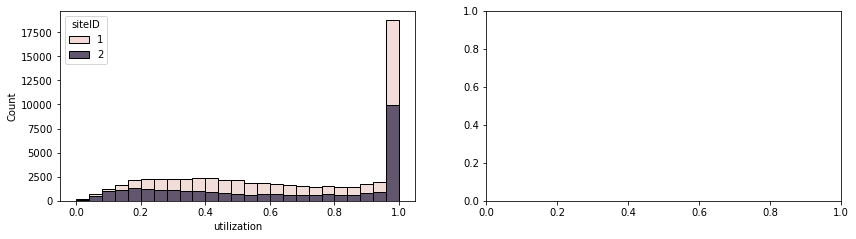

In [15]:
charge_utilization_above_1 = charg_set[1 < charg_set["utilization"]]

plt.rcParams["figure.figsize"] = [14.00, 3.5]
fig, axis = plt.subplots(1,2)
sns.histplot(charg_set, x="utilization", hue="siteID", multiple="stack", bins=25, ax=axis[0])
sns.histplot(charge_utilization_above_1, x="utilization", hue="siteID", multiple="stack", bins=100, ax=axis[1])

charge_utilization_above_1.describe()

We see a significant number of charges where utilization is 100% - these are most likely the ones where the electric vehicle was unplugged before it charged completely. 

There is around 4700 observations where utilization is greater then 1, but since the value is very close to 1, we can treat them as measurement errors.


In [16]:
charg_set.groupby("siteID").agg(avg = pd.NamedAgg(column="kWhDelivered", aggfunc='mean'))

,avg
siteID,
1,14.163862
2,8.812572


In [17]:
charg_set.groupby("siteID").describe()

kWhDelivered                                                        \
              count       mean        std    min      25%     50%     75%   
siteID                                                                      
1           31591.0  14.163862  11.130813  0.502  6.52150  11.290  17.453   
2           29330.0   8.812572   8.115272  0.501  3.32575   6.596  12.499   

                     userID               ...            idleDuration  \
               max    count         mean  ...                     75%   
siteID                                    ...                           
1       108.797242  30158.0  1761.269613  ...         0 days 04:59:23   
2        75.528000  14478.0  1602.630059  ...  0 days 04:47:22.750000   

                        utilization                                          \
                    max       count      mean       std       min       25%   
siteID                                                                        
1       3 days 04:49:04     31591.0  0.653527  0.291621  0.005238  0.399434   
2       6 days 12:07:17     29330.0  0.640354  0.334534  0.000000  0.314013   

                                 
             50%       75%  max  
siteID                           
1       0.652622  0.989354  1.0  
2       0.690130  0.997537  1.0  

[2 rows x 48 columns]

In [18]:
charg_set[charg_set["utilization"] < 0].describe()

,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,idleDuration,utilization
count,0.0,0.0,0.0,0,0,0,0.0
mean,NaN,NaN,NaN,NaT,NaT,NaT,NaN
std,NaN,NaN,NaN,NaT,NaT,NaT,NaN
min,NaN,NaN,NaN,NaT,NaT,NaT,NaN
25%,NaN,NaN,NaN,NaT,NaT,NaT,NaN
50%,NaN,NaN,NaN,NaT,NaT,NaT,NaN
75%,NaN,NaN,NaN,NaT,NaT,NaT,NaN
max,NaN,NaN,NaN,NaT,NaT,NaT,NaN


Assumption: negative utilization is due to time changes

Since the UserID and userInputs have valid charging data, even though they have missing values, the entries will be kept in the dataset.

In [19]:
[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]

[{'WhPerMile': 400,
  'kWhRequested': 8.0,
  'milesRequested': 20,
  'minutesAvailable': 65,
  'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT',
  'userID': 1117},
 {'WhPerMile': 400,
  'kWhRequested': 8.0,
  'milesRequested': 20,
  'minutesAvailable': 65,
  'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT',
  'paymentRequired': True,
  'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT',
  'userID': 1117}]

### Descriptive Analytics

####  Temporal patterns and seasonality

Let's extract the day of the week, month and hour of the day from the connection time, to see the distribution of connections. Since the hour information is sensitive to the timezone, let's first convert it to the local time (America/Los_Angeles)

In [20]:
charg_set["localConnectionTime"] = charg_set["connectionTime"].dt.tz_convert("America/Los_Angeles")
charg_set["localDisconnectTime"] = charg_set["disconnectTime"].dt.tz_convert("America/Los_Angeles")

charg_set["connectionDay"] = charg_set["localConnectionTime"].dt.dayofweek + 1
charg_set["connectionMonth"] = charg_set["localConnectionTime"].dt.month
charg_set["connectionHour"] = charg_set["localConnectionTime"].dt.hour
charg_set["disconnectHour"] = charg_set["localDisconnectTime"].dt.hour

charg_set[["connectionHour", "connectionDay", "connectionMonth", "disconnectHour"]].describe()

,connectionHour,connectionDay,connectionMonth,disconnectHour
count,60921.000000,60921.000000,60921.000000,60921.000000
mean,10.168284,3.240623,6.592571,15.505753
std,4.264981,1.651864,3.370647,3.649122
min,0.000000,1.000000,1.000000,0.000000
25%,7.000000,2.000000,4.000000,14.000000
50%,9.000000,3.000000,7.000000,16.000000
75%,13.000000,4.000000,9.000000,18.000000
max,23.000000,7.000000,12.000000,23.000000


<AxesSubplot:xlabel='disconnectHour', ylabel='Count'>

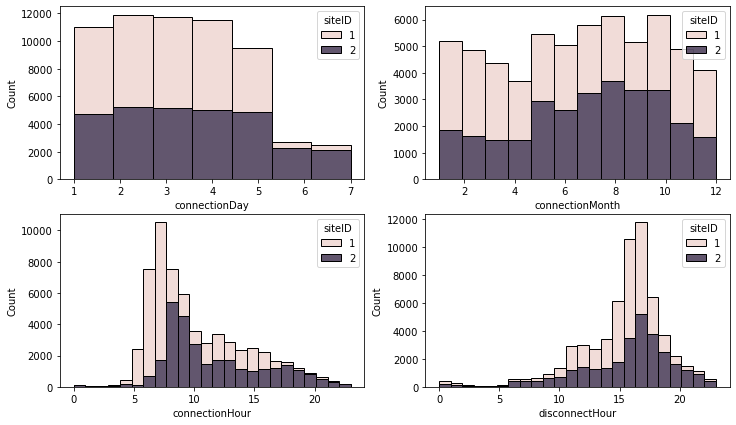

In [21]:
plt.rcParams["figure.figsize"] = [12.00, 7]

fig, axis = plt.subplots(2, 2)
sns.histplot(charg_set, x="connectionDay", hue="siteID", bins=7, ax=axis[0, 0], multiple="stack")
sns.histplot(charg_set, x="connectionMonth", hue="siteID", bins=12, ax=axis[0, 1], multiple="stack")
sns.histplot(charg_set, x="connectionHour", hue="siteID", bins=24, ax=axis[1, 0], multiple="stack")
sns.histplot(charg_set, x="disconnectHour", hue="siteID", bins=24, ax=axis[1, 1], multiple="stack")

There are several observations we can make from the data above:
- As expected, number of charges over the weekend is much smaller than the ones during the working days, since drivers are more likely to charge at home
    - Site `#1` has fewer connections over the weekend, which could mean it's private, and hence less visited over the weekend.
- Connections are most frequent around and during the summer period, May to October, with a significant drop (around 50%) during winter and spring
- Most connections for both sites appear during morning hours (6:00 - 10:00)
    - For site `#1`, majority of connections are made between 5:00 and 18:00, while the one for site `#2` are more evenly spread out
- Most disconnects for both sites appear during afternoon hours (15:00 - 19:00)
    - Similar observation as for the connections, further supporting the idea that site `#1` might be private